In [217]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords, wordnet
import seaborn as sns
import contractions
import re
import string
from nltk.tokenize import word_tokenize

In [218]:
#loading the dataset
tweet_df=train = pd.read_csv('/Users/akhil_kaundinya/Downloads/tweet-sentiment-extraction/train.csv')

In [219]:
tweet_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [220]:
print(tweet_df.shape)

(27481, 4)


In [221]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27479 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [222]:
#Checking for null values
null_val=tweet_df.isna().sum()
null_val

textID           0
text             1
selected_text    2
sentiment        0
dtype: int64

<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

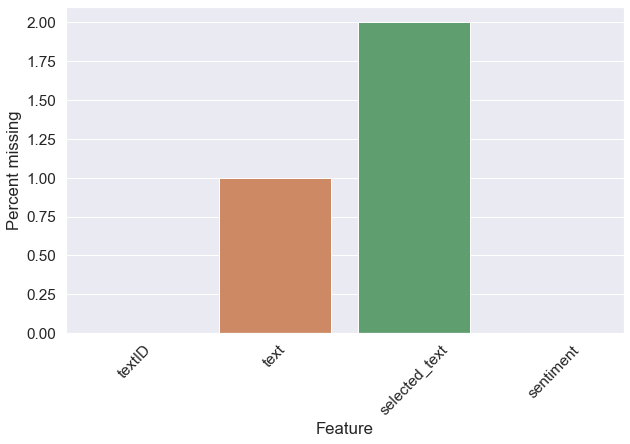

In [224]:
null_val = pd.DataFrame(null_val)
null_val.reset_index(inplace = True)
null_val.columns = ["Feature","Percent missing"]
plt.figure(figsize = (10,6))
plt.xticks(rotation=46)
sns.barplot(x = "Feature",y ="Percent missing",data = null_val)

In [225]:
#dropping selected_text column
tweet_df.drop('selected_text', axis=1, inplace=True)
tweet_df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [226]:
#printing the missing value
tweet_df[tweet_df.isna().any(axis=1)]

,textID,text,sentiment
314,fdb77c3752,NaN,neutral


In [227]:
#replacing the missing value
tweet_df["text"].fillna("It's interesting", inplace = True)
tweet_df.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [228]:
# Sentiment Distribution
tweet=train['sentiment'].value_counts()
tweet

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

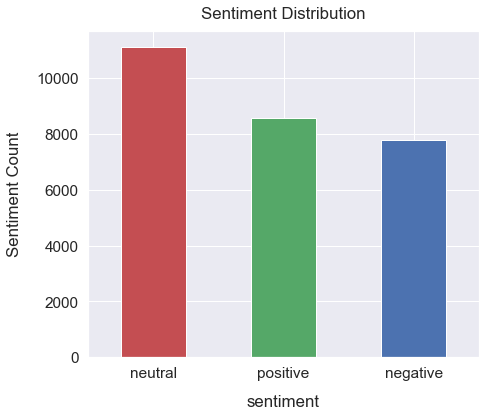

In [229]:
sns.set(font_scale=1.4)
tweet_df['sentiment'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=["r", "g", "b"])
plt.xlabel("sentiment", labelpad=14)
plt.ylabel("Sentiment Count", labelpad=14)
plt.title("Sentiment Distribution", y=1.02);

<AxesSubplot:ylabel='sentiment'>

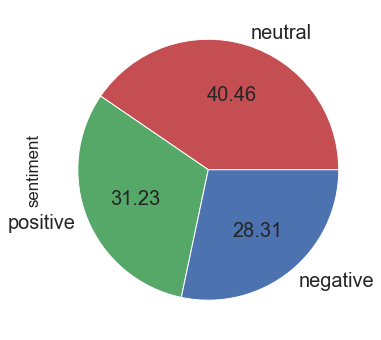

In [230]:
tweet.plot.pie(
    labels=["neutral", "positive", "negative"],
    colors=["r", "g", "b"],
    autopct="%.2f",
    fontsize=20,
    figsize=(6, 6),
)

In [231]:
from plotly import graph_objects as go
t_dist = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Sentiment Distribution"}
    ))
t_dist.show()

# Data Pre-Processing 

In [232]:
#Capitalization on Text
tweet_df["text_UpperCase"] = tweet_df["text"].apply(lambda t: t.upper())
tweet_df.style.background_gradient(cmap='Red')
tweet_df.head()

,textID,text,sentiment,text_UpperCase
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`D HAVE RESPONDED, IF I WERE GOING"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!
2,088c60f138,my boss is bullying me...,negative,MY BOSS IS BULLYING ME...
3,9642c003ef,what interview! leave me alone,negative,WHAT INTERVIEW! LEAVE ME ALONE
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"SONS OF ****, WHY COULDN`T THEY PUT THEM ON T..."


In [233]:
#Removing text Contractions
tweet_df['no_txt_contrac'] = tweet_df['text_UpperCase'].apply(lambda t: ' '.join([contractions.fix(word) for word in str(t).replace('`', '\'').split()]))
tweet_df.head()

,textID,text,sentiment,text_UpperCase,no_txt_contrac
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`D HAVE RESPONDED, IF I WERE GOING","I WOULD HAVE RESPONDED, IF I WERE GOING"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!
2,088c60f138,my boss is bullying me...,negative,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME...
3,9642c003ef,what interview! leave me alone,negative,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW! LEAVE ME ALONE
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"SONS OF ****, WHY COULDN`T THEY PUT THEM ON T...","SONS OF ****, WHY COULD NOT THEY PUT THEM ON T..."


In [234]:
#Cleaning the data by removing square breackets, http, url, special characters, punctuations and text/words containg numbers 
#stop_words = set(stopwords.words('english'))

def tweet_df_clean(no_txt_contrac):
    no_txt_contrac = re.sub('\[.*?\]', '', no_txt_contrac) #square brackets
    no_txt_contrac = re.sub('https?://\S+|www\.\S+', '', no_txt_contrac) #https
    no_txt_contrac = re.sub('<.*?>+', '', no_txt_contrac) #special char
    no_txt_contrac = re.sub('[%s]' % re.escape(string.punctuation), '', no_txt_contrac) #punctuations
    no_txt_contrac = re.sub('\n', '', no_txt_contrac) #spaces
    no_txt_contrac = re.sub('\w*\d\w*', '', no_txt_contrac) #words/sentances with numbers    
    
    #no_txt_contrac = ' '.join([word for word in no_txt_contrac.split() if word not in stop_words])
    return no_txt_contrac

In [235]:
#printing the cleaned data
tweet_df['Clean_text'] = tweet_df['no_txt_contrac'].apply(lambda t:tweet_df_clean(t))
tweet_df.head()

,textID,text,sentiment,text_UpperCase,no_txt_contrac,Clean_text
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`D HAVE RESPONDED, IF I WERE GOING","I WOULD HAVE RESPONDED, IF I WERE GOING",I WOULD HAVE RESPONDED IF I WERE GOING
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO
2,088c60f138,my boss is bullying me...,negative,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME
3,9642c003ef,what interview! leave me alone,negative,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW LEAVE ME ALONE
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"SONS OF ****, WHY COULDN`T THEY PUT THEM ON T...","SONS OF ****, WHY COULD NOT THEY PUT THEM ON T...",SONS OF WHY COULD NOT THEY PUT THEM ON THE RE...


In [236]:
#tokenizing the text
tweet_df['tokenized_text'] = tweet_df['Clean_text'].apply(word_tokenize)
tweet_df.head()

,textID,text,sentiment,text_UpperCase,no_txt_contrac,Clean_text,tokenized_text
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`D HAVE RESPONDED, IF I WERE GOING","I WOULD HAVE RESPONDED, IF I WERE GOING",I WOULD HAVE RESPONDED IF I WERE GOING,"[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO,"[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,..."
2,088c60f138,my boss is bullying me...,negative,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME,"[MY, BOSS, IS, BULLYING, ME]"
3,9642c003ef,what interview! leave me alone,negative,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW LEAVE ME ALONE,"[WHAT, INTERVIEW, LEAVE, ME, ALONE]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"SONS OF ****, WHY COULDN`T THEY PUT THEM ON T...","SONS OF ****, WHY COULD NOT THEY PUT THEM ON T...",SONS OF WHY COULD NOT THEY PUT THEM ON THE RE...,"[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O..."


In [237]:
#Removing Stopword from text
stop = set(stopwords.words('english'))
tweet_df['stopwords'] = tweet_df['tokenized_text'].apply(lambda t: [word for word in t if word not in stop])
tweet_df.head()

,textID,text,sentiment,text_UpperCase,no_txt_contrac,Clean_text,tokenized_text,stopwords
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`D HAVE RESPONDED, IF I WERE GOING","I WOULD HAVE RESPONDED, IF I WERE GOING",I WOULD HAVE RESPONDED IF I WERE GOING,"[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]","[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO,"[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,...","[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,..."
2,088c60f138,my boss is bullying me...,negative,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME,"[MY, BOSS, IS, BULLYING, ME]","[MY, BOSS, IS, BULLYING, ME]"
3,9642c003ef,what interview! leave me alone,negative,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW LEAVE ME ALONE,"[WHAT, INTERVIEW, LEAVE, ME, ALONE]","[WHAT, INTERVIEW, LEAVE, ME, ALONE]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"SONS OF ****, WHY COULDN`T THEY PUT THEM ON T...","SONS OF ****, WHY COULD NOT THEY PUT THEM ON T...",SONS OF WHY COULD NOT THEY PUT THEM ON THE RE...,"[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O...","[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O..."


In [243]:
#After we have tokenized and removed stop words 
#Lets add POS(Parts of speeech) tagging to each word
tweet_df['Tagging'] = tweet_df['stopwords'].apply(lambda t: nltk.tag.pos_tag(t))

# now converting them to adjective, verb, noun and adverb
def get_Tagging(Tagging):
    if Tagging.startswith('J'):
        return wordnet.ADJ
    elif Tagging.startswith('V'):
        return wordnet.VERB
    elif Tagging.startswith('N'):
        return wordnet.NOUN
    elif Tagging.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
tweet_df['Tagging'] = tweet_df['Tagging'].apply(lambda x: [(word, get_Tagging(Tagging)) 
                                                               for (word, Tagging) in x])
tweet_df.head()

,textID,text,sentiment,text_UpperCase,no_txt_contrac,Clean_text,tokenized_text,stopwords,Tagging
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`D HAVE RESPONDED, IF I WERE GOING","I WOULD HAVE RESPONDED, IF I WERE GOING",I WOULD HAVE RESPONDED IF I WERE GOING,"[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]","[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]","[(I, n), (WOULD, v), (HAVE, n), (RESPONDED, n)..."
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO,"[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,...","[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,...","[(SOOO, n), (SAD, n), (I, n), (WILL, v), (MISS..."
2,088c60f138,my boss is bullying me...,negative,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME,"[MY, BOSS, IS, BULLYING, ME]","[MY, BOSS, IS, BULLYING, ME]","[(MY, n), (BOSS, n), (IS, n), (BULLYING, n), (..."
3,9642c003ef,what interview! leave me alone,negative,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW LEAVE ME ALONE,"[WHAT, INTERVIEW, LEAVE, ME, ALONE]","[WHAT, INTERVIEW, LEAVE, ME, ALONE]","[(WHAT, n), (INTERVIEW, n), (LEAVE, n), (ME, n..."
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"SONS OF ****, WHY COULDN`T THEY PUT THEM ON T...","SONS OF ****, WHY COULD NOT THEY PUT THEM ON T...",SONS OF WHY COULD NOT THEY PUT THEM ON THE RE...,"[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O...","[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O...","[(SONS, n), (OF, n), (WHY, n), (COULD, n), (NO..."


In [254]:
from nltk.stem import WordNetLemmatizer
lm = nltk.WordNetLemmatizer()
tweet_df['lemmatization'] = tweet_df['Tagging'].apply(lambda l:[lm.lemmatize(w,t) for w ,t in l])
tweet_df.head()

,textID,text,sentiment,text_UpperCase,no_txt_contrac,Clean_text,tokenized_text,stopwords,Tagging,lemmatization
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`D HAVE RESPONDED, IF I WERE GOING","I WOULD HAVE RESPONDED, IF I WERE GOING",I WOULD HAVE RESPONDED IF I WERE GOING,"[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]","[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]","[(I, n), (WOULD, v), (HAVE, n), (RESPONDED, n)...","[I, WOULD, HAVE, RESPONDED, IF, I, WERE, GOING]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO!!!,SOOO SAD I WILL MISS YOU HERE IN SAN DIEGO,"[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,...","[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,...","[(SOOO, n), (SAD, n), (I, n), (WILL, v), (MISS...","[SOOO, SAD, I, WILL, MISS, YOU, HERE, IN, SAN,..."
2,088c60f138,my boss is bullying me...,negative,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME...,MY BOSS IS BULLYING ME,"[MY, BOSS, IS, BULLYING, ME]","[MY, BOSS, IS, BULLYING, ME]","[(MY, n), (BOSS, n), (IS, n), (BULLYING, n), (...","[MY, BOSS, IS, BULLYING, ME]"
3,9642c003ef,what interview! leave me alone,negative,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW! LEAVE ME ALONE,WHAT INTERVIEW LEAVE ME ALONE,"[WHAT, INTERVIEW, LEAVE, ME, ALONE]","[WHAT, INTERVIEW, LEAVE, ME, ALONE]","[(WHAT, n), (INTERVIEW, n), (LEAVE, n), (ME, n...","[WHAT, INTERVIEW, LEAVE, ME, ALONE]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"SONS OF ****, WHY COULDN`T THEY PUT THEM ON T...","SONS OF ****, WHY COULD NOT THEY PUT THEM ON T...",SONS OF WHY COULD NOT THEY PUT THEM ON THE RE...,"[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O...","[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O...","[(SONS, n), (OF, n), (WHY, n), (COULD, n), (NO...","[SONS, OF, WHY, COULD, NOT, THEY, PUT, THEM, O..."


In [ ]:
T

Stopwords 
tokenizing 
pos tags
wordnet pos
lemmatizeing
ngram-uni gram bigram